You should have finished watching a video on support vector machines.  This algorithm offers very high accuracy compared to other classifiers. It is used in diverse applications such as face detection, intrusion detection, classification of emails,  and handwriting recognition.  This classifier works by separating data points using a hyperplane with the largest amount of margin.

Let's take a look at using SVM to analyze if we can use specific data measurements to improve the diagnosis of breast cancer.  We have a dataset that includes tumors, malignant (cancerous) or benign (non-cancerous), and features obtained from several cell images.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.  The dataset is hosted [here](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29) but I have put it also in our Github repository.

Briefly:

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

Additionally, the mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  

In [1]:
import pandas as pd
dataset = pd.read_csv('cancer.csv')
dataset.head()

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,conc_mean,conc_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,conc_worst,conc_points_worst,symmetry_worst,fractral_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
import seaborn as sns
sns.pairplot(dataset, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean'])

To prepare the dataset for SVM algorithms, I'd suggest doing three things:

1.  Check for NA values.  Previously, I've pretty much ignored this step but for your own datasets you may want to do so to decide how to deal with them.

2.  Decide what data goes into your X and y variables.  

3.  Ensure that the label categories are numeric.

4.  Create training and test datasets.


In [3]:
dataset.isnull().sum()
dataset.isna().sum()

ID                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
conc_mean            0
conc_points_mean     0
symmetry_mean        0
fractral_mean        0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
conc_se              0
conc_points_se       0
symmetry_se          0
fractral_se          0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
conc_worst           0
conc_points_worst    0
symmetry_worst       0
fractral_worst       0
dtype: int64

In [4]:
X = dataset.iloc[:, 2:32].values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
Y = dataset.iloc[:,1].values
Y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [6]:
# You've learned one way of doing this previously in our Naive Bayes tutorial.
# Here is another nifty way of converting labels to numerical values.

#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [7]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
X_train.shape

(426, 30)

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

In [10]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
Y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [13]:
cm

array([[88,  2],
       [ 3, 50]])

Discuss the success of this model for predicting malignant and benign tumors.


In [14]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

0.965034965034965

The accuracy of the model is about 0.965 which is a high accuracy. Also, the confusion matrix shows that most predictions from test dataset are correct. So the model is working effectively for predicting malignant and benign tumors.

Conceptual Review Questions:
1.  What is a hyperplane in SVM and how is it used?
2.  What are two tuning parameters that can be used for SVM and how do they impact the model in terms of overfitting?
3.  What are the pros and cons of SVMs?
4.  Describe the concepts of bias, variance, and overfitting and how they could be used to evaluate models we build in this class.

Hyperplane in SVM is the line that best split datasets, so that the distance between the data points and the line are as far as possible. The hyperplane is used for future prediction. First tuning parameter is the C parameter, lower C will allow misclassification and higher C will make few mistakes. Generally, higher C tend to overfit the data. Second tuning parameter is the Gamma parameter, small Gamma will have less complexity and large Gamma will have more complexity. And large Gamma tend to overfit the data. Advantages of SVMs are it's good for processing high dimensional data and small datasets. On the other hand, the disadvantage is picking the right kernel and parameters can be challenging. Bias is measuring how well the model represents the trainning data, variance is mean sum of squares for predicting datasets, and overfitting means the model has concentrated too much on the given dataset that it's hard to give precision predictions on new datapoints. To evaluate models, lower bias and variance would be prefered, which will tell us the model is not overfitting the data. 

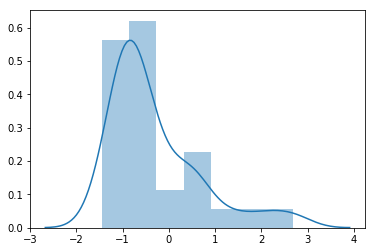

In [15]:
sns.distplot(X_train[1,:])

## Part 2: Own advanture - Radial Basis Function Kernel
For data sets that are not linearly separable, we can add an extra data dimension that's computed based on original data to turn the 2D data into 3D. So that, with additional dimension, the data can be linearly separated by drawing a plane in 3D data. However, one big problem for this adding dimensions method, when the data set grows larger that more dimensions are needed, it might become very computationally intensive. A simpler method we can use is the radial basis function (rbf) kernel that is build into the SVM. It will try to find a radial pattern to classify the data. 

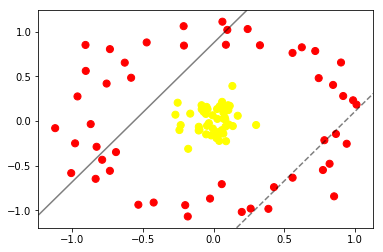

In [16]:
# import library to generate sample data
from sklearn.datasets.samples_generator import make_circles
# import library for plots
import matplotlib.pyplot as plt
# import support vector classifier
from sklearn.svm import SVC
%matplotlib inline
import numpy as np

# generate 100 data points of two groups in circle pattern
X, y = make_circles(100, factor=.1, noise=.1)

# fit linear SVM of the sample data
clf = SVC(kernel='linear').fit(X, y)

# Create a function for visualize 2D SVM model
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# scatter plot of the dataset and linear fit
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

The plot shows clearly that there is no linear relationship of the dataset. We can add a third dimension based on the original data so that linear separator could work. For example, since the data points are symetric about the center origin, we can compute a radial basis function centered on the middle clump. 

In [17]:
# compute third dimension based on x, larger absolute x smaller r
r = np.exp(-(X ** 2).sum(1))

# import library for plot 3D data
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

# Creat function for 3D plot
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
# define the viewing angle and elevation
interact(plot_3D, elev=[0, 20, 30, 40, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=2, options=(0, 20, 30, 40, 90), value=30), IntSlider(…

We can see from the 3D plot that the data can be linearly separated by drawing a horizontal plane, say, at r = 0.75. This method works for our sample dataset, since the dataset is relatively small with only two original variables and it's centered at the origin. If the dataset is not centered in the right location or there are more original variables, this method might not work. Another method we can use is the radial basis function (rbf) kernel that is build into the SVM model. The model will be computed based on the original dataset without building extra dimensions. 

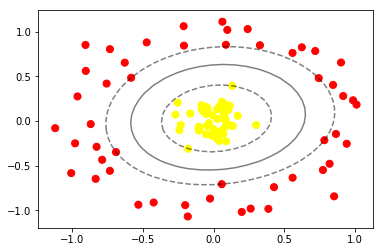

In [18]:
# fit rbf SVM of the sample data
clf = SVC(kernel='rbf', C=1E6, gamma = 'auto')
clf.fit(X, y)

# scatter plot of the dataset and rbf fit
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

The plot above shows the data points are seperated by the radial basis function SVM model. The data points outside the solid dark line will be classified as red group, inside the solid line will be classified as yellow group. Using this kernelized support vector machine, we can deal with radial pattern data that does not fit for the linear kernel SVM. Original code are posted on github. (https://github.com/joyleeisu/ABE516X-SVM.git)